## Cleansing

In [1]:
import pandas as pd
import warnings

In [2]:
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv('./fake reviews dataset.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40432 entries, 0 to 40431
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   category  40432 non-null  object 
 1   rating    40432 non-null  float64
 2   label     40432 non-null  object 
 3   text_     40432 non-null  object 
dtypes: float64(1), object(3)
memory usage: 1.2+ MB


In [5]:
df.head()

,category,rating,label,text_
0,Home_and_Kitchen_5,5.0,CG,"Love this! Well made, sturdy, and very comfor..."
1,Home_and_Kitchen_5,5.0,CG,"love it, a great upgrade from the original. I..."
2,Home_and_Kitchen_5,5.0,CG,This pillow saved my back. I love the look and...
3,Home_and_Kitchen_5,1.0,CG,"Missing information on how to use it, but it i..."
4,Home_and_Kitchen_5,5.0,CG,Very nice set. Good quality. We have had the s...


In [6]:
from langdetect import detect, detect_langs

In [7]:
df.dropna(inplace=True)

In [8]:
df = df[df['text_'].apply(lambda x: len(x.split(' ')) >= 10)]
df = df[df['text_'].apply(lambda x: len(x.split(' ')) <= 30)]

In [9]:
df.reset_index(inplace = True)

In [10]:
df

,index,category,rating,label,text_
0,0,Home_and_Kitchen_5,5.0,CG,"Love this! Well made, sturdy, and very comfor..."
1,1,Home_and_Kitchen_5,5.0,CG,"love it, a great upgrade from the original. I..."
2,2,Home_and_Kitchen_5,5.0,CG,This pillow saved my back. I love the look and...
3,3,Home_and_Kitchen_5,1.0,CG,"Missing information on how to use it, but it i..."
4,4,Home_and_Kitchen_5,5.0,CG,Very nice set. Good quality. We have had the s...
...,...,...,...,...,...
16225,38882,Clothing_Shoes_and_Jewelry_5,2.0,CG,I sent them back. They were too small and too ...
16226,38917,Clothing_Shoes_and_Jewelry_5,5.0,CG,"These are my 5th pair,wear them everyday and t..."
16227,38941,Clothing_Shoes_and_Jewelry_5,5.0,CG,"Cute, comfy, as expected. These are a little w..."
16228,38997,Clothing_Shoes_and_Jewelry_5,2.0,CG,Too short. I'm 6'1 and it fits me fine. I've h...


In [11]:
idx_lst = []

for row in df.iterrows():
    idx = row[0]
    val = row[1]
    
    try:
        for element in detect_langs(val['text_']):
            if element.lang == 'en' and element.prob >= 0.6:
                idx_lst.append(idx)
            else:
                continue
    except:
        print(idx)

15644


In [12]:
df.iloc[idx_lst, :].head()

,index,category,rating,label,text_
0,0,Home_and_Kitchen_5,5.0,CG,"Love this! Well made, sturdy, and very comfor..."
1,1,Home_and_Kitchen_5,5.0,CG,"love it, a great upgrade from the original. I..."
2,2,Home_and_Kitchen_5,5.0,CG,This pillow saved my back. I love the look and...
3,3,Home_and_Kitchen_5,1.0,CG,"Missing information on how to use it, but it i..."
4,4,Home_and_Kitchen_5,5.0,CG,Very nice set. Good quality. We have had the s...


In [13]:
df = df.astype(str).apply(lambda x: x.str.encode('ascii', 'ignore').str.decode('ascii'))

In [14]:
df = df.sample(frac=1)

In [15]:
df = df[['category', 'rating', 'label', 'text_']]

## Exploration

In [16]:
df['rating'] = df['rating'].astype('float')

In [17]:
df.describe()

,rating
count,16230.000000
mean,4.367714
std,1.091294
min,1.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


In [18]:
n = len(df)
dict_ = df.rating.value_counts().to_dict()
for k in dict_:
    dict_[k] = dict_[k] / n
dict(sorted(dict_.items(), reverse=True))

{5.0: 0.6651879235982748,
 4.0: 0.1713493530499076,
 3.0: 0.07714109673444239,
 2.0: 0.038632162661737524,
 1.0: 0.04768946395563771}

In [19]:
df.category.value_counts()

Clothing_Shoes_and_Jewelry_5    1898
Home_and_Kitchen_5              1802
Pet_Supplies_5                  1730
Sports_and_Outdoors_5           1707
Toys_and_Games_5                1693
Tools_and_Home_Improvement_5    1604
Electronics_5                   1533
Books_5                         1468
Movies_and_TV_5                 1446
Kindle_Store_5                  1349
Name: category, dtype: int64

In [20]:
df.label.value_counts()

CG    8856
OR    7374
Name: label, dtype: int64

In [21]:
df.groupby(['category', 'label']).count()

rating  text_
category                     label               
Books_5                      CG        799    799
                             OR        669    669
Clothing_Shoes_and_Jewelry_5 CG       1026   1026
                             OR        872    872
Electronics_5                CG        849    849
                             OR        684    684
Home_and_Kitchen_5           CG        977    977
                             OR        825    825
Kindle_Store_5               CG        754    754
                             OR        595    595
Movies_and_TV_5              CG        791    791
                             OR        655    655
Pet_Supplies_5               CG        936    936
                             OR        794    794
Sports_and_Outdoors_5        CG        933    933
                             OR        774    774
Tools_and_Home_Improvement_5 CG        873    873
                             OR        731    731
Toys_and_Games_5             CG        918    918
                             OR        775    775

In [22]:
df['text_'] = df['text_'].astype('str')

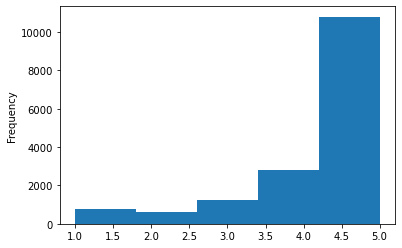

In [23]:
df.rating.plot.hist(bins=5)

## Database Import data

In [24]:
df[df['text_'].apply(lambda x: len(x.split(' ')) == 30)]['text_'].values[1]

'I was cutting some 2" thick plywood and using a saw blade for the saw blade, and I had to cut through the plywood to get the saw blade to'

In [25]:
df = df[df['text_'].apply(lambda x: x[-1] == '.')]

In [26]:
df1 = df.head(200)

In [27]:
df1.to_csv('./fake_review_200.csv', index=None)

## Visual

In [28]:
import nltk
import re
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer 
from nltk.tokenize import RegexpTokenizer

stopwords = stopwords.words('english')
stemmer = SnowballStemmer('english')
tokenizer = RegexpTokenizer(r'\w+')
# As this dataset is fetched from twitter so it has lots of people tag in tweets
# we will remove them 
tags = r"@\w*"


def preprocess_text(sentence, stem = False):
    
    sentence = [re.sub(tags, "", sentence)]
    text = []
    for word in sentence:
        
        if word not in stopwords:
            
            if stem:
                text.append(stemmer.stem(word).lower())
            else:
                text.append(word.lower())
    return tokenizer.tokenize(" ".join(text))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\tinkpad\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [29]:
#preprocess_text(df.text_[11])
df.text_ = df.text_.map(preprocess_text)
df.head()

,category,rating,label,text_
15684,Clothing_Shoes_and_Jewelry_5,4.0,OR,"[my, danske, clogs, are, a, 41, and, loose, fi..."
375,Home_and_Kitchen_5,5.0,OR,"[nice, size, fits, perfectly, love, the, added..."
5522,Movies_and_TV_5,5.0,OR,"[i, absolutely, love, the, twilight, zone, the..."
7863,Tools_and_Home_Improvement_5,4.0,CG,"[the, light, could, be, brighter, but, it, s, ..."
8528,Pet_Supplies_5,4.0,OR,"[my, pups, loved, this, but, they, were, able,..."


In [30]:
from nltk.stem.snowball import SnowballStemmer

In [31]:
df['stemmed'] = df['text_'].apply(lambda x: [stemmer.stem(y) for y in x]) # Stem every word.
#df = df.drop(columns=['unstemmed'])
df.head()

,category,rating,label,text_,stemmed
15684,Clothing_Shoes_and_Jewelry_5,4.0,OR,"[my, danske, clogs, are, a, 41, and, loose, fi...","[my, dansk, clog, are, a, 41, and, loos, fit, ..."
375,Home_and_Kitchen_5,5.0,OR,"[nice, size, fits, perfectly, love, the, added...","[nice, size, fit, perfect, love, the, ad, orga..."
5522,Movies_and_TV_5,5.0,OR,"[i, absolutely, love, the, twilight, zone, the...","[i, absolut, love, the, twilight, zone, the, p..."
7863,Tools_and_Home_Improvement_5,4.0,CG,"[the, light, could, be, brighter, but, it, s, ...","[the, light, could, be, brighter, but, it, s, ..."
8528,Pet_Supplies_5,4.0,OR,"[my, pups, loved, this, but, they, were, able,...","[my, pup, love, this, but, they, were, abl, to..."


In [37]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt

In [38]:
text = df.text_

In [39]:
text_lst = []
for k in text:
    for w in k:
        text_lst.append(w)

In [40]:
text = ' '.join(text_lst)

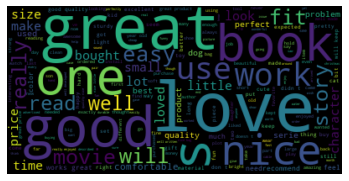

In [41]:
# Create and generate a word cloud image:
wordcloud = WordCloud().generate(text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

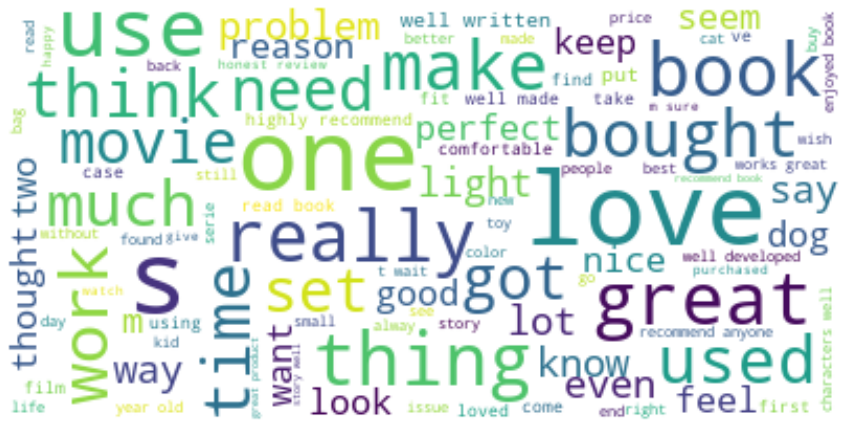

In [133]:
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(text)
plt.figure(figsize=(15,15))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

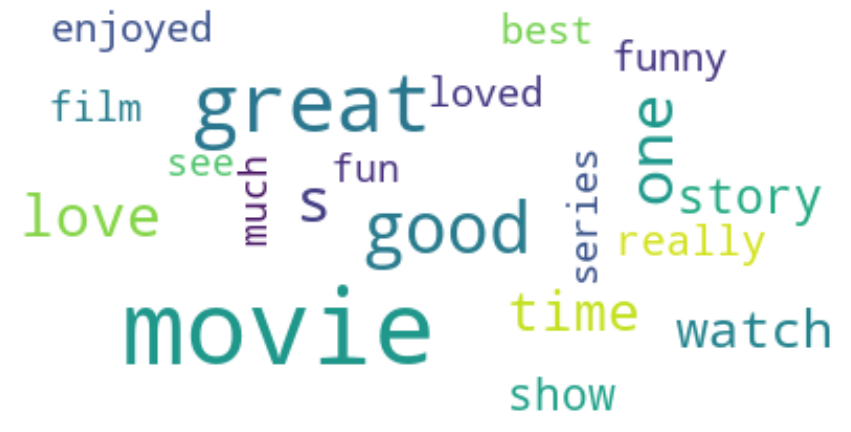

In [42]:
text = df[(df['label'] == 'OR') & (df['category'] == 'Movies_and_TV_5')].text_

text_lst = []
for k in text:
    for w in k:
        text_lst.append(w)
        
text = ' '.join(text_lst)

wordcloud = WordCloud(max_font_size=50, max_words=20, background_color="white").generate(text)
plt.figure(figsize=(15,15))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

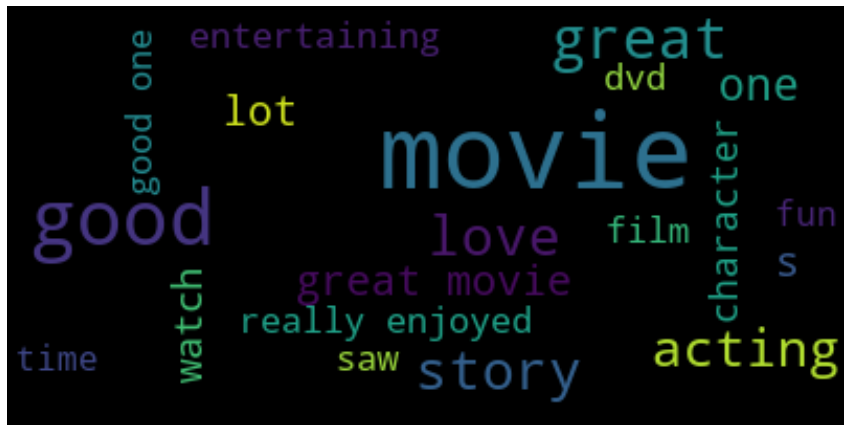

In [43]:
text = df[(df['label'] == 'CG') & (df['category'] == 'Movies_and_TV_5')].text_

text_lst = []
for k in text:
    for w in k:
        text_lst.append(w)
        
text = ' '.join(text_lst)

wordcloud = WordCloud(max_font_size=50, max_words=20).generate(text)
plt.figure(figsize=(15,15))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [47]:
df1[(df1['label'] == 'CG') & (df1['category'] == 'Movies_and_TV_5')]['text_'].values

array([list(['good', 'show', 'did', 'not', 'find', 'it', 'entertaining', 'not', 'for', 'children', 'would', 'not', 'recommend']),
       list(['great', 'movie', 'my', 'wife', 'and', 'i', 'love', 'the', 'movie', 'very', 'good', 'movie']),
       list(['always', 'been', 'a', 'barbra', 'fan', 'and', 'this', 'movie', 'was', 'very', 'funny', 'i', 'also', 'enjoyed', 'the', 'music', 'and', 'the', 'story']),
       list(['it', 'was', 'pretty', 'good', 'not', 'a', 'bad', 'movie', 'just', 'not', 'a', 'lot', 'of', 'action']),
       list(['i', 'bought', 'this', 'dvd', 'to', 'see', 'what', 'the', 'movie', 'was', 'like', 'i', 'didn', 't', 'know', 'what', 'the', 'movie', 'was', 'about']),
       list(['information', 'humor', 'a', 'little', 'slow', 'at', 'times', 'but', 'good', 'enough', 'to', 'make', 'a', 'movie', 'worth', 'watching', 'i', 'really', 'enjoyed', 'the', 'film', 'the', 'script', 'and', 'acting', 'were', 'very', 'good']),
       list(['this', 'movie', 'is', 'one', 'of', 'the', 'most', 'e